In [ ]:
#imporing the nececcesary library
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
 #Converting the Iris data to a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# viewing the data()
print (iris_df.head())
print (iris_df.shape)
print (iris_df.info())
print (iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        1

In [ ]:
# Standardising the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Performing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


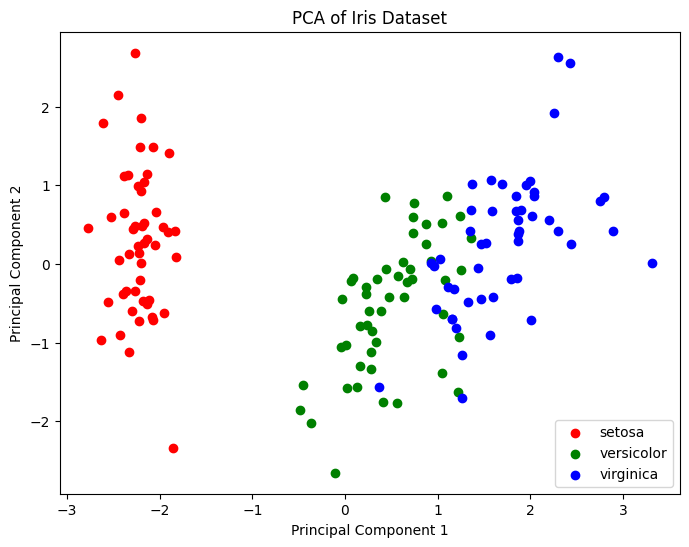

In [ ]:
# Plotting PCA results
plt.figure(figsize=(8, 6))
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_names[target], color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

In [ ]:
# Classification using Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


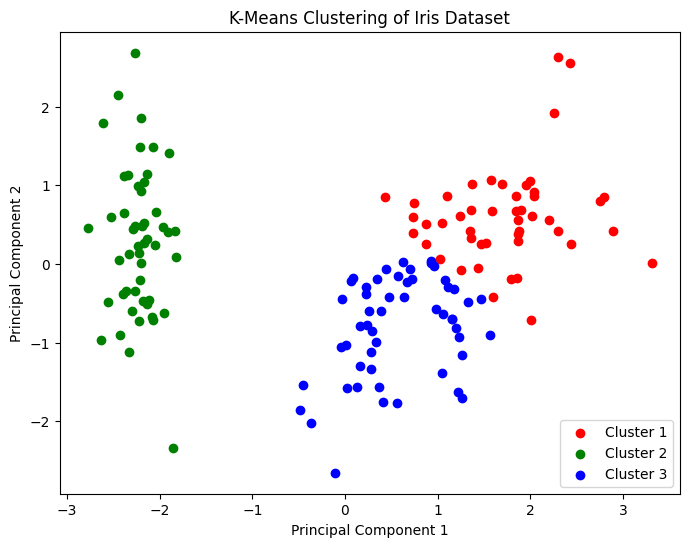

In [ ]:
# Plot clustering results
plt.figure(figsize=(8, 6))
for cluster, color in zip(range(3), ['r', 'g', 'b']):
    plt.scatter(X_pca[y_kmeans == cluster, 0], X_pca[y_kmeans == cluster, 1], label=f'Cluster {cluster+1}', color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()